w.shape: (15, 1)
X_train.shape: (414, 15)
X_test.shape: (276, 15)
y_train.shape: (414, 1)
y_test.shape: (276, 1)
2187.3290245
2187.32540131
[0.8376811594202899, 0.8565217391304348, 0.8565217391304348, 0.8579710144927536, 0.8536231884057971, 0.8492753623188406, 0.8463768115942029, 0.836231884057971, 0.8318840579710145, 0.8043478260869565, 0.7710144927536232, 0.7521739130434782, 0.7347826086956522, 0.7275362318840579, 0.7028985507246377, 0.6782608695652174, 0.6594202898550725, 0.6159420289855072, 0.6014492753623188, 0.5884057971014492, 0.5797101449275363, 0.5782608695652174, 0.5623188405797102, 0.5565217391304348, 0.5420289855072464, 0.5260869565217391, 0.4985507246376812, 0.45507246376811594, 0.4391304347826087, 0.4318840579710145, 0.4260869565217391, 0.42028985507246375, 0.4115942028985507, 0.4043478260869565, 0.38405797101449274, 0.36666666666666664, 0.35797101449275365, 0.35797101449275365, 0.35797101449275365, 0.35797101449275365, 0.35797101449275365, 0.35797101449275365, 0.35797101

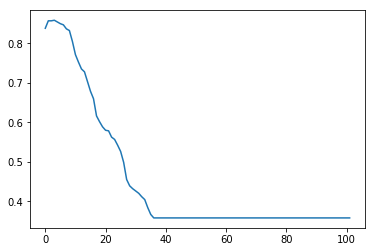

In [47]:
import sklearn
import numpy as np

from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
mem = Memory("./mycache")

@mem.cache
def get_data():
    data = load_svmlight_file('F:/MLworkplace/australian_scale')
    return data[0], data[1]

X, y = get_data()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)


#初始化w
w = np.zeros(15);
w = np.mat(w)
w = w.T
print("w.shape:",w.shape)
G = w;

ones = np.ones(X_train.shape[0])
ones = np.mat(ones)
ones = ones.T
X_train = X_train.todense()
X_train = np.column_stack((X_train,ones))

onesV = np.ones(X_test.shape[0])
onesV = np.mat(onesV)
onesV = onesV.T
X_test = X_test.todense()
X_test = np.column_stack((X_test,onesV))

onesa = np.ones(X.shape[0])
onesa = np.mat(onesa)
onesa = onesa.T
X = X.todense()
X = np.column_stack((X,onesa))

print("X_train.shape:",X_train.shape)
print("X_test.shape:",X_test.shape)

y_train = np.mat(y_train)
y_train = y_train.T
y_test = np.mat(y_test)
y_test = y_test.T
print("y_train.shape:",y_train.shape)
print("y_test.shape:",y_test.shape)

y = np.mat(y)
y = y.T

iterator = 0;#迭代次数  
hinge = 0
hinge_validate = 0
times = []   #迭代次数
loss = 0
loss_v = 0
loss_train = []   #训练集loss值
loss_validate = []  #验证集loss值
right_rate =[]
right_rate_train = []
right_rate_validate = []
while True:
    
    w = gradient(X_train,y_train,w) ;# 0.00005是学习速率
    
    loss = cal_loss(X_train,y_train,w)#1/2 *(w.T * w) + hinge
    loss_v = cal_loss(X_test,y_test,w)#1/2 *(w.T * w) + hinge_validate
    
    times.append(iterator) 
    
    loss_train.append(loss[0,0])
    loss_validate.append(loss_v[0,0])
    right_rate.append(cal_right_rate(X,y,w))
    right_rate_train.append(cal_right_rate(X_train,y_train,w))
    right_rate_validate.append(cal_right_rate(X_test,y_test,w))
    
    if (iterator > 100): #如果误差小于5或者迭代次数大于10000则停止  
        break; 
    iterator = iterator + 1;  
    
print(loss_train[-1])
print(loss_validate[-1])
print(right_rate)

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
#line_loss_train, = plt.plot(times , loss_train)
#line_loss_validate, = plt.plot(times , loss_validate)
#plt.xlabel('iterate times')
#plt.ylabel('loss')
#plt.legend([line_loss_train,line_loss_validate],['train','validate'])
#plt.show()

#line_right_rate_train, = plt.plot(times , right_rate_train)
#line_right_rate_validate, = plt.plot(times , right_rate_validate)
#plt.xlabel('iterate times')
#plt.ylabel('right_rate')
plt.plot(times , right_rate)
#plt.legend([line_right_rate_train,line_right_rate_validate],['train','validate'])
plt.show()

In [46]:
def gradient(x,y,w):
    M = x.shape[0]
    N = y.shape[0]
    m = np.zeros((M,1))
    _y =y
    for i in range(M):
        if(1-y[i].T*(x[i]*w)<0):
            _y[i] = 0

    g = w + 0.5*x.T.dot(_y)
    return g

In [3]:
def cal_loss(x,y,w):
    
    l=0
    M = x.shape[0]
    _y = y
    for i in range(M):
        if(1 - y[i].T*(x[i]*w)<0):
            _y[i]=0
        l+=_y[i]
    l/=M
    l+=(w.T*w)/2
    return l

In [4]:
def cal_right_rate(x,y,w):
    
    m = y.shape[0]
    right_num = 0 
    right = np.zeros(m)
    right = x*w  
    for i in range(m):
        if right[i][0] > 0:
            right[i][0]=1
        if right[i][0] < 0:
            right[i][0]=-1
    
    for i in range(m):
        if (right[i][0] == y[i][0]):
            right_num+=1
    return right_num/m
    